## Predicting Bike Rentals with Random Forests

Many American cities have communal bike sharing stations where anyone can rent bicycles by the hour or day. In this project, we'll try to predict the total number of bikes people rented in a given hour by creating a few different machine learning models and evaluating their performance. 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from math import sqrt
warnings.filterwarnings("ignore")

In [115]:
bike_rentals= pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()
bike_rentals.shape

(17379, 17)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

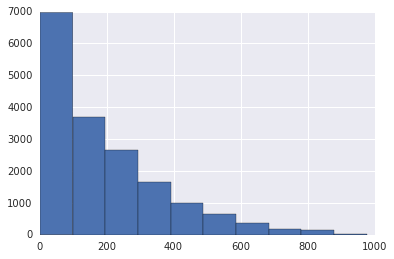

In [116]:
% matplotlib inline
plt.hist(bike_rentals.cnt) #Distribution of total rentals.

In [117]:
corr_df= bike_rentals.corr()
corr_cnt_col= np.abs(corr_df.cnt)
corr_cnt_col

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday       0.030927
weekday       0.026900
workingday    0.030284
weathersit    0.142426
temp          0.404772
atemp         0.400929
hum           0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Calculating Features

In [118]:
#Creating a new column with labels for morning, afternoon, evening, and night for 'hr' column. 
def assign_label(num):
    if num in range(6,12):
        return 1
    elif num in range(12,18):
        return 2
    elif num in range(18,24):
        return 3
    elif num in range(0,6):
        return 4
    
bike_rentals.time_label= bike_rentals['hr'].apply(assign_label)   
bike_rentals.time_label.head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    1
7    1
8    1
9    1
Name: hr, dtype: int64

Here I'm using Root Mean Squared Error (RMSE) to evaluate the performance of the machine learning algorithms.
Along with R square to calculate accuracy of the various models.

In [119]:
# Split data into train and test set.
train= bike_rentals.sample(frac= 0.8, random_state=1)
train.shape

(13903, 17)

In [120]:
test= bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.shape

(3476, 17)

Linear Regression

In [121]:
features= (bike_rentals.drop(['cnt','casual','registered','dteday','instant','temp'], axis=1)).columns
features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [122]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [123]:
lr= LinearRegression()
lr.fit(train[features], train.cnt)
predictions= lr.predict(test[features])
mse= mean_squared_error(test.cnt, predictions)
rmse= sqrt(mse)
R_squared= r2_score(test.cnt, predictions)
print('RMSE: {:.2f}, R_squared: {:.2f}'.format(rmse,R_squared))


RMSE: 139.94, R_squared: 0.38


RMSE is around 139.94 as our Linear model is not overfitted but having accuracy around 38%, which is not so good.

Applying Decision trees

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
clf= DecisionTreeRegressor(min_samples_leaf= 2)
clf.fit(train[features], train.cnt)
predictions= clf.predict(test[features])
mse= mean_squared_error(test.cnt, predictions)
rmse= sqrt(mse)
R_squared= r2_score(test.cnt, predictions)
print('RMSE: {:.2f}, R_squared: {:.2f}'.format(rmse,R_squared))

RMSE: 56.66, R_squared: 0.90


RMSE is around 56.66 and accuracy around 90%, which clearly indicates that Decision Tree algorithm is a fairly best choice for this data set. But Decision trees are prone to overfitting. 

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
clf= RandomForestRegressor(min_samples_leaf= 2, n_estimators= 80)
clf.fit(train[features], train.cnt)
predictions= clf.predict(test[features])
mse= mean_squared_error(test.cnt, predictions)
rmse= sqrt(mse)
R_squared= r2_score(test.cnt, predictions)
print('RMSE: {:.2f}, R_squared: {:.2f}'.format(rmse,R_squared))                    

RMSE: 44.58, R_squared: 0.94


RMSE is around 44.58 and accuracy around 94%, indicating Random forest algorithm to be a great choice. Random forests tend to be much more accurate than simple models like linear regression and also tend to overfit much less than decision trees.